In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble as RandomForestClassifier
import sklearn.svm as SVC
import sklearn.linear_model as LogisticRegression
import sklearn.metrics as confusion_matrix
import sklearn.preprocessing as StandardScaler
import sklearn.model_selection as train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\sunin\Downloads\archive (13)\bankloans.csv")

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [6]:
df = df.dropna()

In [8]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [9]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

<Axes: xlabel='age', ylabel='income'>

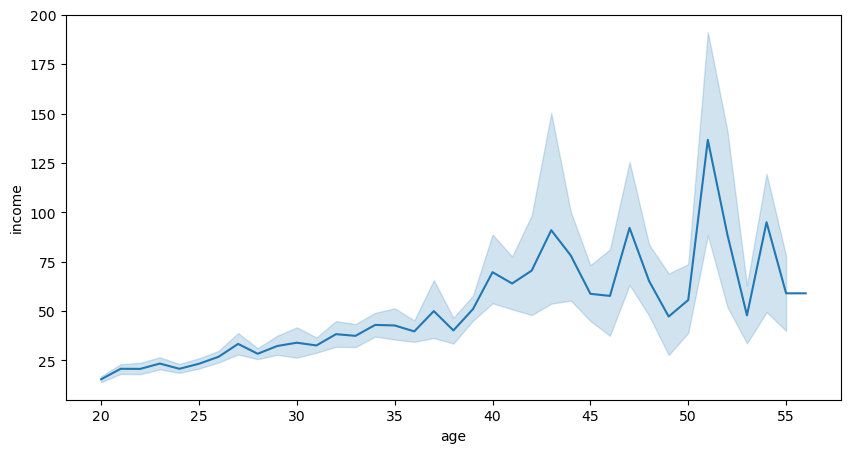

In [13]:
#to get the relationship between age and income using a lineplot-It can be seen that age and income are directly related-with increasing age, the income increases
fig, axes = plt.subplots(figsize = (10,5))
sns.lineplot(x = 'age', y = 'income',data = df,ax = axes)

<Axes: xlabel='age', ylabel='debtinc'>

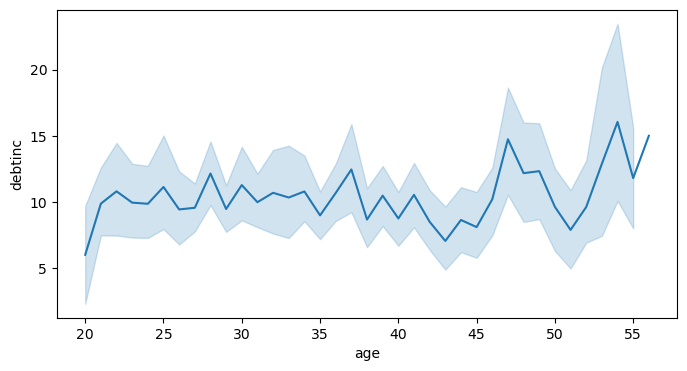

In [14]:
#to get the relationship between age and debt, the light blue color shows the confidence interval which is inbuilt in seaborn. It shows the fluctuating trend of debtinc but mostly stays between 5-15
fig, axes = plt.subplots(figsize = (8,4))
sns.lineplot(x = 'age', y = 'debtinc',data = df, ax = axes)

In [16]:
#We need to check the default customers i.e -whether they'll be able to pay the loan or not. For this,I need to split my dataset into training and testing.
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [23]:
x = df.drop(['default'], axis = 1)
y = df['default']


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [31]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [35]:
#Creating Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)


In [38]:
#Fit the values
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [39]:
rfc.score(x_test,y_test)

0.8142857142857143

In [42]:
sv.score(x_test,y_test)

0.7928571428571428

In [42]:
sv.score(x_test,y_test)

0.7928571428571428

In [41]:
#SVM MODEL
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)


SVC()

In [52]:
from sklearn.model_selection import cross_val_score
rfc2 = cross_val_score(estimator = rfc, X = x_train, y =y_train, cv = 10)
rfc2.mean()

0.7839285714285713

In [53]:
#Model = Grid Search CV
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.4,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0],
    'kernel':['rbf','linear']
}, scoring = 'accuracy',cv = 10) 

In [54]:
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.4, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [56]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [57]:
model2 = SVC(C = 0.1, gamma = 0.1,kernel = 'linear')
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.8214285714285714

In [60]:
#Linear Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)


0.8357142857142857

<Axes: >

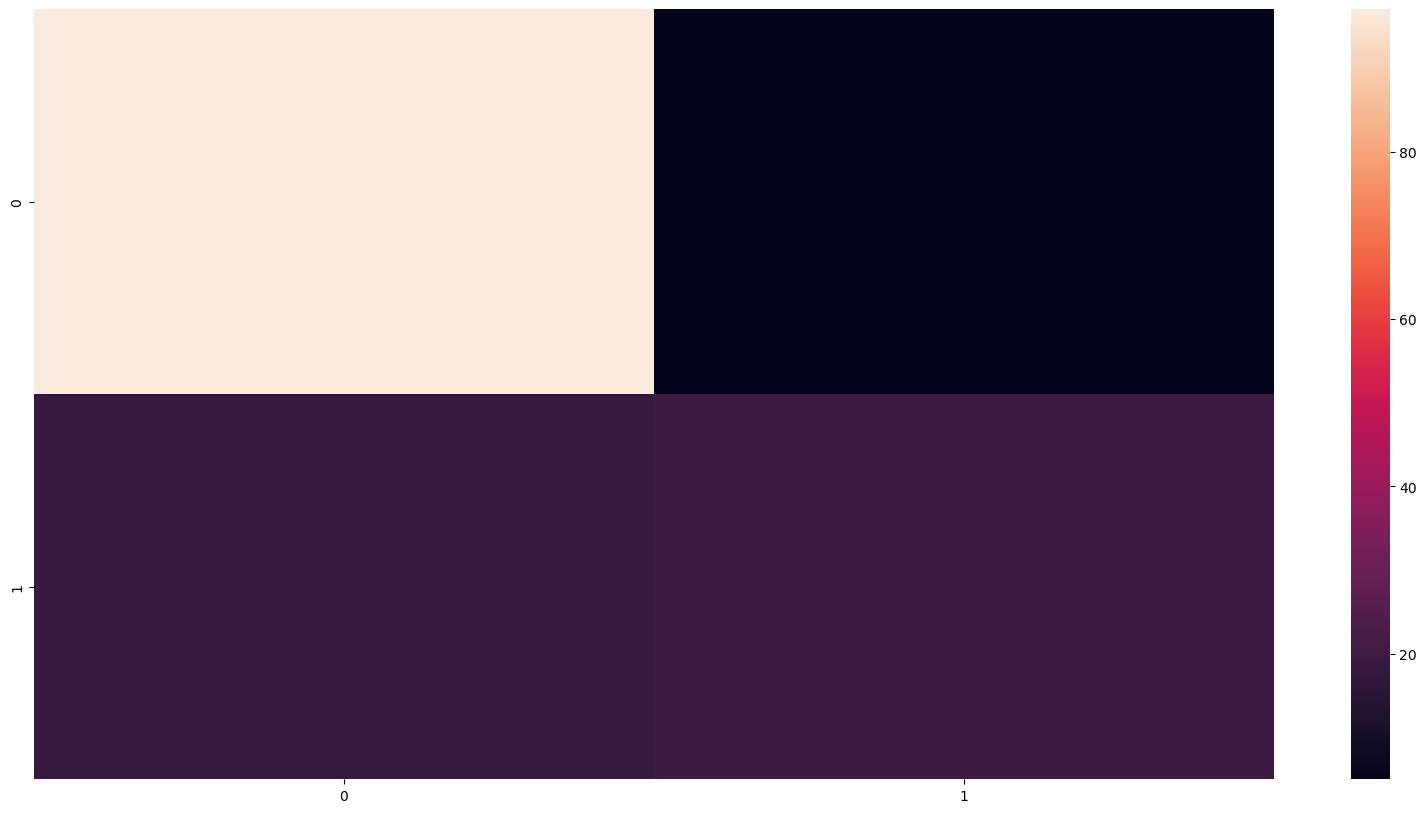

In [62]:
#Confusion Matrix Model
from sklearn.metrics import confusion_matrix
yp = lr.predict(x_test)
c = confusion_matrix(y_test,yp)
fig,axes = plt.subplots(figsize = (20,10))
sns.heatmap(c,ax = axes)